# Notebook

# Librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42


# Configuration graphique

In [ ]:
# Thème global
sns.set_theme(
    style="whitegrid",
    context="notebook",
    palette="deep"
)
COLOR_NO_DEFAULT = "#4C72B0"   # bleu seaborn
COLOR_DEFAULT = "#DD8452"      # orange doux

# Les données

In [3]:
from pathlib import Path

DATA_DIR = Path("../data/raw")
train_path = DATA_DIR / "application_train.csv"

df = pd.read_csv(train_path)
df.shape


(307511, 122)

In [4]:
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df["TARGET"].value_counts(normalize=True)


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Valeurs manquantes

In [7]:
missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate.head(15)


COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
dtype: float64

Un grand nombre de variables présente des valeurs manquantes importantes.
Certaines variables sont très incomplètes et devront être exclues ou traitées
spécifiquement lors de la phase de préparation des données.


In [8]:
df.dtypes.value_counts()


float64    65
int64      41
object     16
Name: count, dtype: int64

Le jeu de données contient un mélange de variables numériques et catégorielles.
Cette hétérogénéité nécessitera un prétraitement spécifique
(imputation, encodage) avant la modélisation.

## AGE

In [9]:
# Âge en années (plus lisible que DAYS_BIRTH)
df["AGE_YEARS"] = -df["DAYS_BIRTH"] / 365

df["AGE_YEARS"].describe()


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE_YEARS, dtype: float64

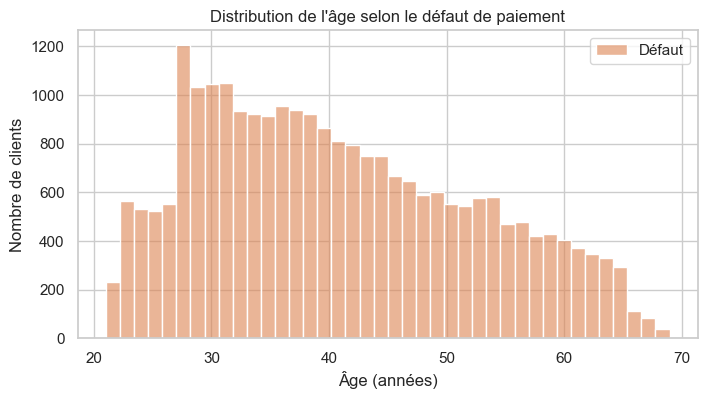

In [ ]:
plt.figure(figsize=(8, 4))

# sns.histplot(
#     df[df["TARGET"] == 0]["AGE_YEARS"],
#     bins=40,
#     color=COLOR_NO_DEFAULT,
#     label="Sans défaut",
#     alpha=0.6
# )

sns.histplot(
    df[df["TARGET"] == 1]["AGE_YEARS"],
    bins=40,
    color=COLOR_DEFAULT,
    label="Défaut",
    alpha=0.6
)

plt.xlabel("Âge (années)")
plt.ylabel("Nombre de clients")
plt.title("Distribution de l'âge selon le défaut de paiement")
plt.legend()
plt.show()


Les clients les plus jeunes présentent une probabilité plus élevée de défaut de paiement.
Cette observation est cohérente avec l’intuition métier :
les profils plus jeunes ont souvent une situation financière moins stable.

## Revenu annuel

In [11]:
df["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

/var/folders/v6/hrwbqnpd18x2mytmy_s0ly6r0000gn/T/ipykernel_14869/512004697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


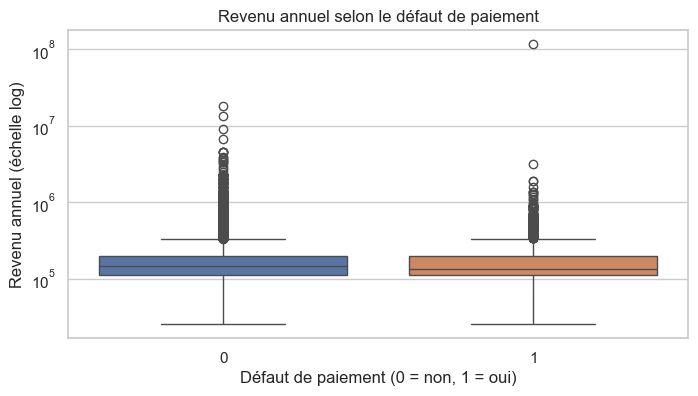

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x="TARGET",
    y="AMT_INCOME_TOTAL",
    palette=[COLOR_NO_DEFAULT, COLOR_DEFAULT]
)
plt.yscale("log")
plt.title("Revenu annuel selon le défaut de paiement")
plt.xlabel("Défaut de paiement (0 = non, 1 = oui)")
plt.ylabel("Revenu annuel (échelle log)")
plt.show()
